In [0]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random

Using TensorFlow backend.


In [0]:
np.random.seed(0)

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [0]:
num_of_samples = []
cols = 5
num_of_classes = 10

In [0]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [0]:
X_train = X_train/255
X_test = X_test/255

In [0]:
num_of_pixels = 784
X_train = X_train.reshape(X_train.shape[0], num_of_pixels)
X_test = X_test.reshape(X_test.shape[0], num_of_pixels)

In [0]:
def create_model():
  model = Sequential()
  model.add(Dense(10, input_dim=num_of_pixels, activation='relu'))
  model.add(Dense(10, activation='relu'))
  model.add(Dense(num_of_classes, activation='softmax'))
  model.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [0]:
model = create_model()
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
h = model.fit(X_train, y_train, batch_size=200, validation_split=0.1, epochs=10)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 1s 27us/step - loss: 0.5412 - accuracy: 0.8304 - val_loss: 0.2736 - val_accuracy: 0.9208
Epoch 2/10
54000/54000 [==============================] - 1s 20us/step - loss: 0.3025 - accuracy: 0.9109 - val_loss: 0.2370 - val_accuracy: 0.9312
Epoch 3/10
54000/54000 [==============================] - 1s 20us/step - loss: 0.2758 - accuracy: 0.9189 - val_loss: 0.2286 - val_accuracy: 0.9312
Epoch 4/10
54000/54000 [==============================] - 1s 20us/step - loss: 0.2638 - accuracy: 0.9221 - val_loss: 0.2129 - val_accuracy: 0.9373
Epoch 5/10
54000/54000 [==============================] - 1s 20us/step - loss: 0.2461 - accuracy: 0.9274 - val_loss: 0.2173 - val_accuracy: 0.9385
Epoch 6/10
54000/54000 [==============================] - 1s 20us/step - loss: 0.2408 - accuracy: 0.9296 - val_loss: 0.2155 - val_accuracy: 0.9392
Epoch 7/10
54000/54000 [==============================] - 1s 21us/ste

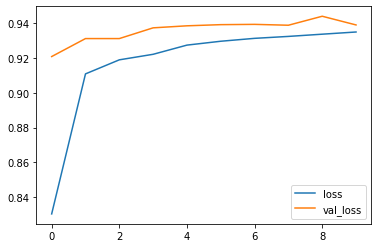

In [0]:
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.legend(['loss', 'val_loss'])
plt.show()

In [0]:
score = model.evaluate(X_test, y_test, verbose=0)
print(score[0], score[1])

0.2535222074568272 0.9280999898910522


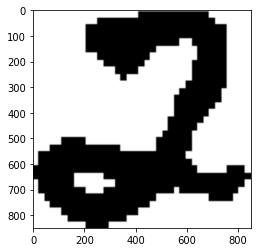

In [0]:
import requests
from PIL import Image
url = 'https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png'
response = requests.get(url, stream=True)
img = Image.open(response.raw)
plt.imshow(img)

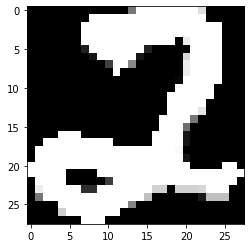

In [0]:
import cv2
img_array = np.asarray(img)
resized = cv2.resize(img_array, (28,28))
gray_scale = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
image = cv2.bitwise_not(gray_scale)
plt.imshow(image, cmap=plt.get_cmap("gray"))

In [0]:
image = image/255
image = image.reshape(1, 784)

In [0]:
prediction = model.predict_classes(image)
print(prediction)

[3]
